In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410789


In [8]:
start = '2020-01-01'
end = '2022-11-01'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920586
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561539
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846375
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426826
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081497


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.102661
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.560196
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.482086
2022-10-31,154.240005,151.919998,153.160004,153.339996,97943200.0,153.086044
2022-11-01,155.449997,149.130005,155.080002,150.649994,80379300.0,150.400497


In [10]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920586
1,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561539
2,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846375
3,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426826
4,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081497


In [11]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,73.419998,72.379997,72.482498,73.412498,100805600.0
1,75.150002,73.797501,74.059998,75.087502,135480400.0
2,75.144997,74.125000,74.287498,74.357498,146322800.0
3,74.989998,73.187500,73.447502,74.949997,118387200.0
4,75.224998,74.370003,74.959999,74.597504,108872000.0


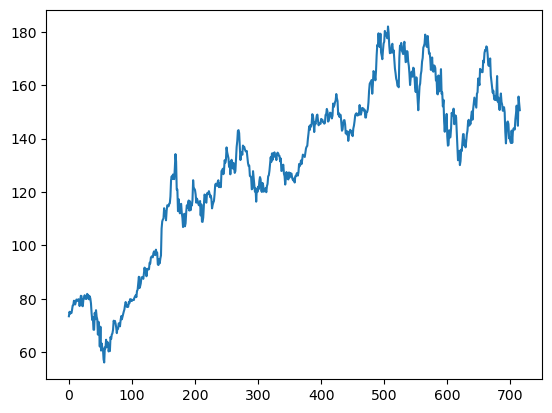

In [12]:
plt.plot(df.Close)

In [13]:
df

,High,Low,Open,Close,Volume
0,73.419998,72.379997,72.482498,73.412498,100805600.0
1,75.150002,73.797501,74.059998,75.087502,135480400.0
2,75.144997,74.125000,74.287498,74.357498,146322800.0
3,74.989998,73.187500,73.447502,74.949997,118387200.0
4,75.224998,74.370003,74.959999,74.597504,108872000.0
...,...,...,...,...,...
711,151.990005,148.039993,150.960007,149.350006,88194300.0
712,149.050003,144.130005,148.070007,144.800003,109180200.0
713,157.500000,147.820007,148.199997,155.740005,164762400.0
714,154.240005,151.919998,153.160004,153.339996,97943200.0


In [14]:
ma50 = df.Close.rolling(50).mean()
ma50

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
711    152.763399
712    152.168399
713    151.800200
714    151.436599
715    151.098199
Name: Close, Length: 716, dtype: float64

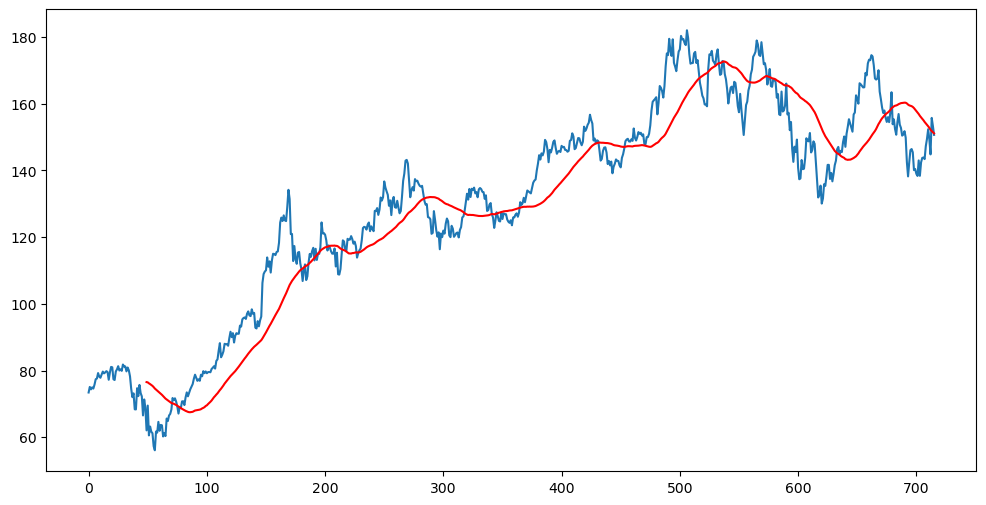

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')

ma100 = df.Close.rolling(100).mean()
ma100

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
711    151.2670
712    151.2536
713    151.3239
714    151.3777
715    151.4578
Name: Close, Length: 716, dtype: float64

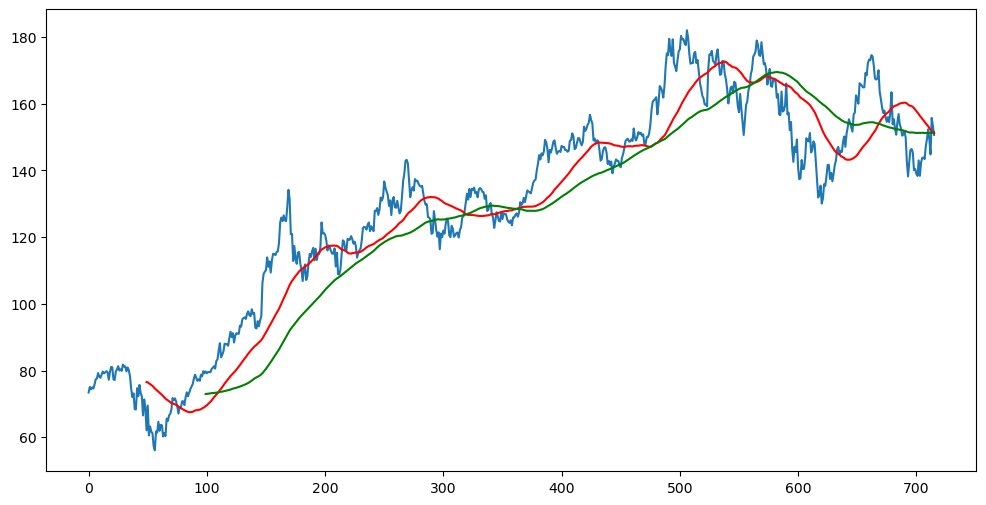

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')
plt.plot(ma100, 'g')

In [18]:
df.shape

(716, 5)

In [19]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(501, 1)
(215, 1)


In [20]:
data_training.head()

,Close
0,73.412498
1,75.087502
2,74.357498
3,74.949997
4,74.597504


In [21]:
data_testing.head()

,Close
501,180.330002
502,179.289993
503,179.380005
504,178.199997
505,177.570007


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
dataTrainingArray = scaler.fit_transform(data_training)
dataTrainingArray

array([[0.14040492],
       [0.15398337],
       [0.14806558],
       [0.15286868],
       [0.15001119],
       [0.15973899],
       [0.17279049],
       [0.17420909],
       [0.18764566],
       [0.17897169],
       [0.17625601],
       [0.18415985],
       [0.19123283],
       [0.18685531],
       [0.18914541],
       [0.19224615],
       [0.19038162],
       [0.1714124 ],
       [0.18912512],
       [0.2026022 ],
       [0.20164968],
       [0.1725473 ],
       [0.17082466],
       [0.19147602],
       [0.19674527],
       [0.20436536],
       [0.19386743],
       [0.19694788],
       [0.19301622],
       [0.20839839],
       [0.20367631],
       [0.20383847],
       [0.19178   ],
       [0.20114302],
       [0.1944146 ],
       [0.17972153],
       [0.14958555],
       [0.12911658],
       [0.13837829],
       [0.09960885],
       [0.09928458],
       [0.15086234],
       [0.13162964],
       [0.15882698],
       [0.13892552],
       [0.1310419 ],
       [0.08471317],
       [0.123

In [24]:
dataTrainingArray.shape

(501, 1)

In [26]:
x_train = []
y_train = []

for i in range(50, dataTrainingArray.shape[0]):
    x_train.append(dataTrainingArray[i-50: i])
    y_train.append(dataTrainingArray[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(451, 50, 1)

In [ ]:
# ML MODEL

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

Metal device set to: Apple M1


2022-11-05 23:46:34.271841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-05 23:46:34.272666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 50, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 50, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 25)

Epoch 1/25


2022-11-05 23:54:09.644256: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-05 23:54:10.581219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 143s 9s/step - loss: 0.1777
Epoch 2/25
15/15 [==============================] - 144s 10s/step - loss: 0.0367
Epoch 3/25
15/15 [==============================] - 144s 10s/step - loss: 0.0225
Epoch 4/25
15/15 [==============================] - 145s 10s/step - loss: 0.0147
Epoch 5/25
15/15 [==============================] - 150s 10s/step - loss: 0.0098
Epoch 6/25
15/15 [==============================] - 154s 10s/step - loss: 0.0077
Epoch 7/25
15/15 [==============================] - 150s 10s/step - loss: 0.0070
Epoch 8/25
15/15 [==============================] - 147s 10s/step - loss: 0.0062
Epoch 9/25
15/15 [==============================] - 143s 10s/step - loss: 0.0052
Epoch 10/25
15/15 [==============================] - 142s 9s/step - loss: 0.0054
Epoch 11/25
15/15 [==============================] - 143s 10s/step - loss: 0.0045
Epoch 12/25
15/15 [==============================] - 144s 10s/step - loss: 0.0040
Epoch 13/25
15/15 [===================

In [32]:
model.save('keras_model.h5')

In [36]:
past_50_days = data_training.tail(50)

In [34]:
final_df = past_50_days.append(data_testing, ignore_index = True)

/var/folders/0j/0x_fq94s04dggyp2g6q1b5vc0000gn/T/ipykernel_5484/579984410.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_50_days.append(data_testing, ignore_index = True)


In [35]:
final_df.head()

,Close
0,143.759995
1,144.839996
2,146.550003
3,148.759995
4,149.259995


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.26371507],
       [0.28450432],
       [0.31742072],
       [0.35996146],
       [0.3695861 ],
       [0.37382097],
       [0.35861417],
       [0.35765164],
       [0.37074131],
       [0.36169412],
       [0.43330146],
       [0.37998088],
       [0.36381155],
       [0.38421574],
       [0.41251221],
       [0.40231011],
       [0.40846973],
       [0.39230041],
       [0.39942255],
       [0.34379214],
       [0.34282962],
       [0.38363829],
       [0.38383068],
       [0.40307996],
       [0.45101077],
       [0.53532241],
       [0.58691063],
       [0.59595782],
       [0.60346502],
       [0.61366712],
       [0.51491822],
       [0.5809434 ],
       [0.67834471],
       [0.66814261],
       [0.64870065],
       [0.61174207],
       [0.67872978],
       [0.79153027],
       [0.86660264],
       [0.85659293],
       [0.95072189],
       [0.87930723],
       [0.85216568],
       [0.94783462],
       [0.81231953],
       [0.79076043],
       [0.76400394],
       [0.826

In [38]:
input_data.shape

(265, 1)

In [39]:
x_test = []
y_test = []

for i in range(50, input_data.shape[0]):
    x_test.append(input_data[i-50: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(215, 50, 1)
(215,)


In [ ]:
# Making Predictions

In [40]:
y_predicted = model.predict(x_test)

2022-11-06 01:05:54.514724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 4s 462ms/step


In [41]:
y_predicted.shape

(215, 1)

In [42]:
y_test

array([0.96766135, 0.94764194, 0.9493746 , 0.92666029, 0.91453345,
       1.        , 0.95553421, 0.86352268, 0.80731482, 0.81058716,
       0.81097223, 0.86660264, 0.87526475, 0.81097223, 0.82791169,
       0.76496646, 0.6962464 , 0.66313761, 0.6227143 , 0.60750721,
       0.5720886 , 0.57035624, 0.56130905, 0.77516856, 0.86082779,
       0.85755545, 0.88123198, 0.82463905, 0.81482203, 0.80077014,
       0.86179032, 0.88970171, 0.80962464, 0.74263723, 0.74725716,
       0.82252162, 0.81790198, 0.74725716, 0.71684327, 0.6594805 ,
       0.57767106, 0.6290666 , 0.66968259, 0.67487968, 0.6379211 ,
       0.70259869, 0.6962464 , 0.63734365, 0.56284903, 0.52704536,
       0.63310878, 0.54783462, 0.47487968, 0.39576514, 0.48180944,
       0.56843119, 0.58825793, 0.65293552, 0.67988469, 0.74610225,
       0.77285874, 0.84716097, 0.85967288, 0.87661234, 0.94128993,
       0.91838324, 0.85755545, 0.85178061, 0.93128023, 0.86621757,
       0.80404248, 0.81000971, 0.77054863, 0.68700682, 0.72377

In [43]:
y_predicted

array([[0.59840965],
       [0.61053383],
       [0.6223572 ],
       [0.63400537],
       [0.64551187],
       [0.65682983],
       [0.66805065],
       [0.679162  ],
       [0.689897  ],
       [0.69982624],
       [0.708565  ],
       [0.71582824],
       [0.7216272 ],
       [0.7260885 ],
       [0.7292329 ],
       [0.7311588 ],
       [0.7318459 ],
       [0.7311285 ],
       [0.7288228 ],
       [0.72475433],
       [0.7188635 ],
       [0.71112525],
       [0.70164496],
       [0.6906283 ],
       [0.67876905],
       [0.66691136],
       [0.6557981 ],
       [0.6460718 ],
       [0.638108  ],
       [0.63205814],
       [0.6278972 ],
       [0.62561303],
       [0.6251206 ],
       [0.62615645],
       [0.6282913 ],
       [0.6310593 ],
       [0.634231  ],
       [0.6376158 ],
       [0.6409292 ],
       [0.64387894],
       [0.64609367],
       [0.6470883 ],
       [0.6466833 ],
       [0.64489555],
       [0.64187855],
       [0.6378361 ],
       [0.63307685],
       [0.627

In [44]:
scaler.scale_

array([0.01924928])

In [45]:
scale_factor = 1/0.01924928
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

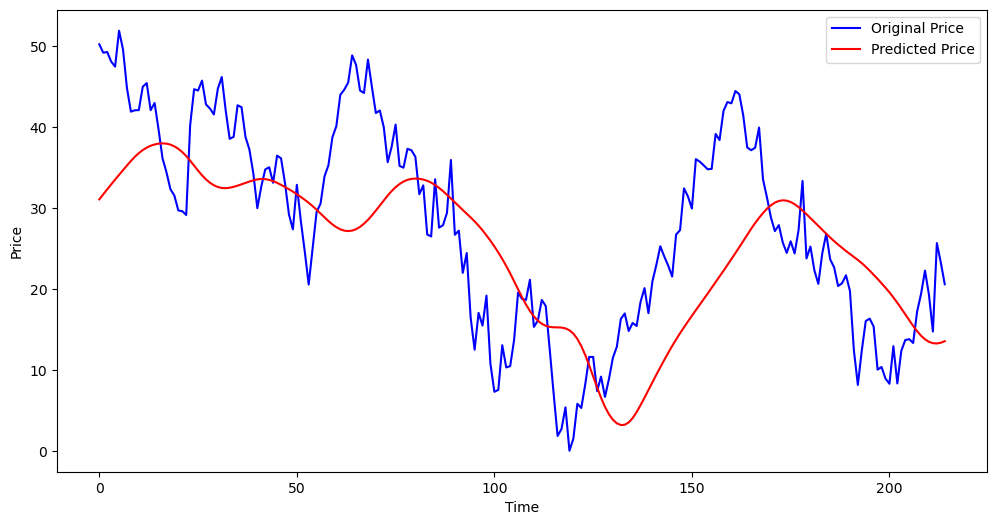

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()